<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/1.g.%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
پیشبینی قیمت خانه های بوستون (رگرسیون):


2.6016254395785847e-15
0.9999999999999993
Epoch 1/250


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 571.2993
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 587.5117  
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 568.6135 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 567.8544 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 560.8465 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 579.3998  
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 563.4824 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 567.3450  
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 585.2101 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 547.4295 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 575.3956 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 544.7770 
Epoch 13/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 547.4856 
Epoch 14/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 550.6768 
Epoch 15/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 545.5791

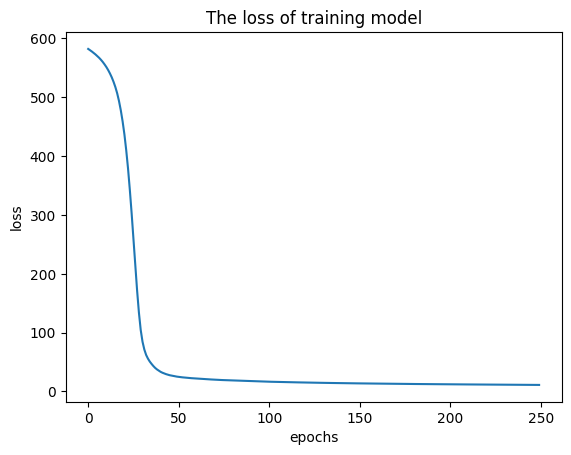

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.7067 
22.132850646972656


In [4]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.datasets import boston_housing

(x_train,y_train), (x_test,y_test) = boston_housing.load_data()

### Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(np.mean(x_train))
print(np.std(x_train))
x_test = sc.transform(x_test)

Model = Sequential()
Model.add(Dense(10, input_dim=13))
Model.add(Activation('relu'))
Model.add(Dense(5))
Model.add(Activation('relu'))
Model.add(Dense(1))

from tensorflow.keras.optimizers import Adadelta
Model.compile(loss='mse',
              optimizer= Adadelta(learning_rate=0.4))

history = Model.fit(x_train, y_train, epochs=250,
          batch_size = 64)
a = history.history
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

predictions = Model.predict(x_test)
Loss = Model.evaluate(x_test, y_test)
print(Loss)